In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model

import pickle
%matplotlib inline

In [153]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [154]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [4]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [5]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [6]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

# EDA

In [66]:
df.shape

(1000, 40)

# We have 1000 rows and 40 columns in dataset

In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# We have mixture of int, float and object  type value in all independent variables.

In [11]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [12]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

# Min months_as_customere is 0 to max 479 and Age is 19 to max 64 an so on.

# Checking Null values

In [116]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

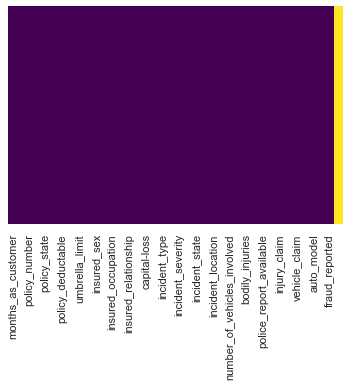

In [117]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# there are missing values present in the dataset of _c39 Column.

# Data Cleaning

In [155]:
# Dropping columns 
df.drop('_c39',axis=1,inplace=True)

In [119]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:>

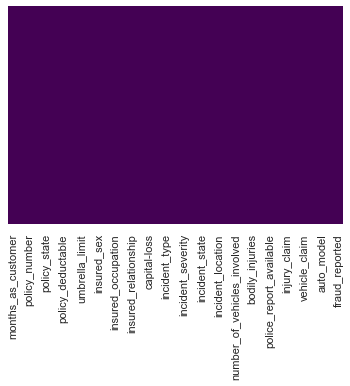

In [120]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# No more missing values in the data set.

In [156]:
#Checking missing values
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [157]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 39 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [74]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

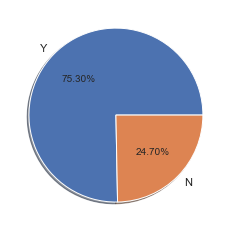

In [75]:
labels = 'Y', 'N'

fig, ax = plt.subplots()
ax.pie(df['fraud_reported'].value_counts(),labels=labels, autopct='%1.2f%%', shadow=True)

plt.show()

# fraud_reported, Yes = 75.30% and No = 24.70%

# Univariate analysis

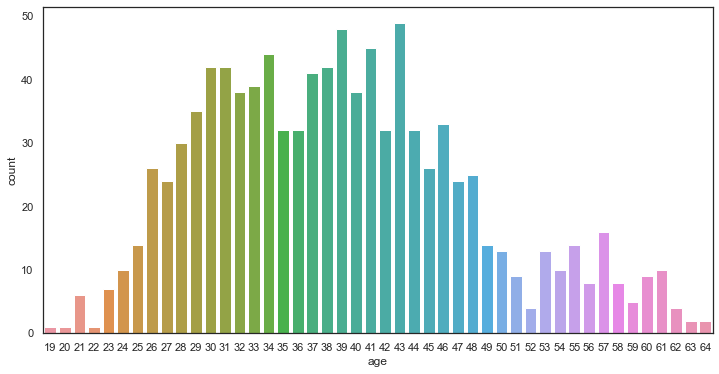

In [80]:
plt.figure(figsize=(12,6))
sn.countplot(df['age'])
plt.show()

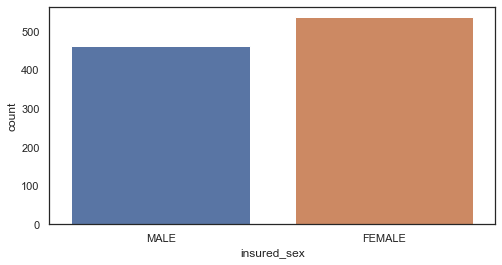

In [83]:
plt.figure(figsize=(8,4))
sn.countplot(df['insured_sex'])
plt.show()

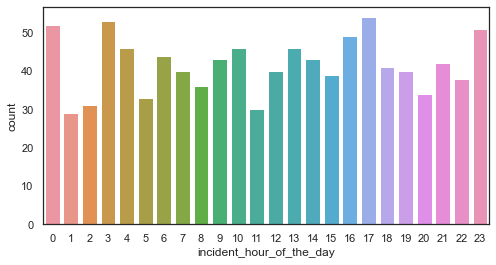

In [86]:
plt.figure(figsize=(8,4))
sn.countplot(df['incident_hour_of_the_day'])
plt.show()

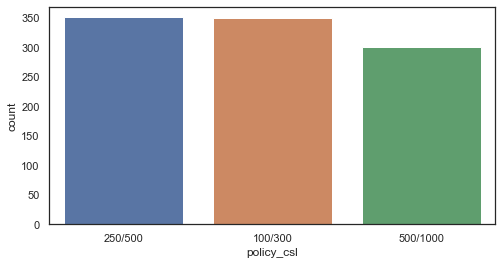

In [87]:
plt.figure(figsize=(8,4))
sn.countplot(df['policy_csl'])
plt.show()

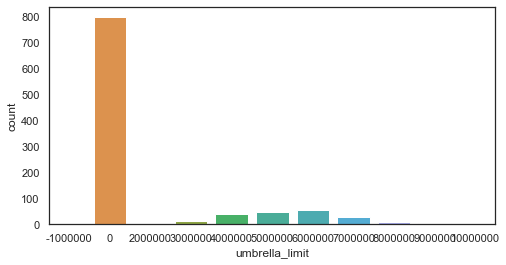

In [88]:
plt.figure(figsize=(8,4))
sn.countplot(df['umbrella_limit'])
plt.show()

# Bivariate analysis,

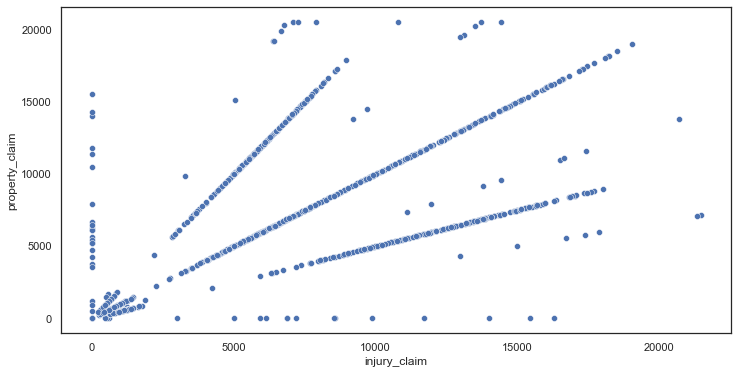

In [146]:
plt.figure(figsize=(12,6))
sn.scatterplot(x = 'injury_claim',y = 'property_claim', data=df, palette= 'inferno')
plt.show()

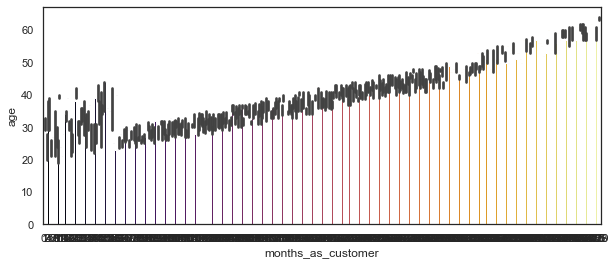

In [92]:
plt.figure(figsize=(10,4))
sn.barplot(x ='months_as_customer', y ='age', data = df, palette = "inferno")
plt.show()

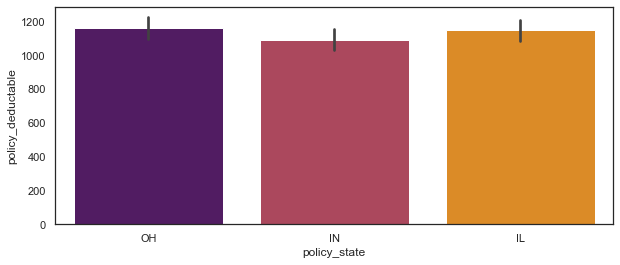

In [93]:
plt.figure(figsize=(10,4))
sn.barplot(x ='policy_state', y ='policy_deductable', data = df, palette = "inferno")
plt.show()

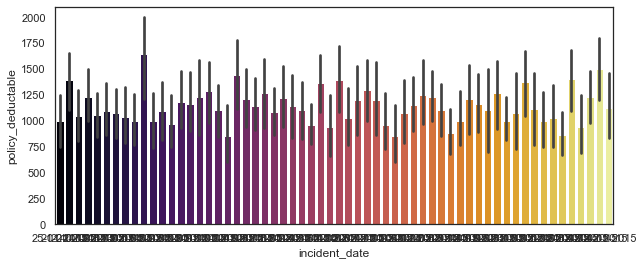

In [95]:
plt.figure(figsize=(10,4))
sn.barplot(x ='incident_date', y ='policy_deductable', data = df, palette = "inferno")
plt.show()

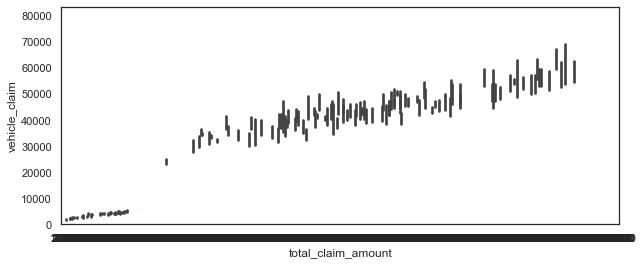

In [105]:
plt.figure(figsize=(10,4))
sn.barplot(x ='total_claim_amount', y ='vehicle_claim', data = df, palette = "inferno")
plt.show()

# Multivariate analysis

<Figure size 576x288 with 0 Axes>

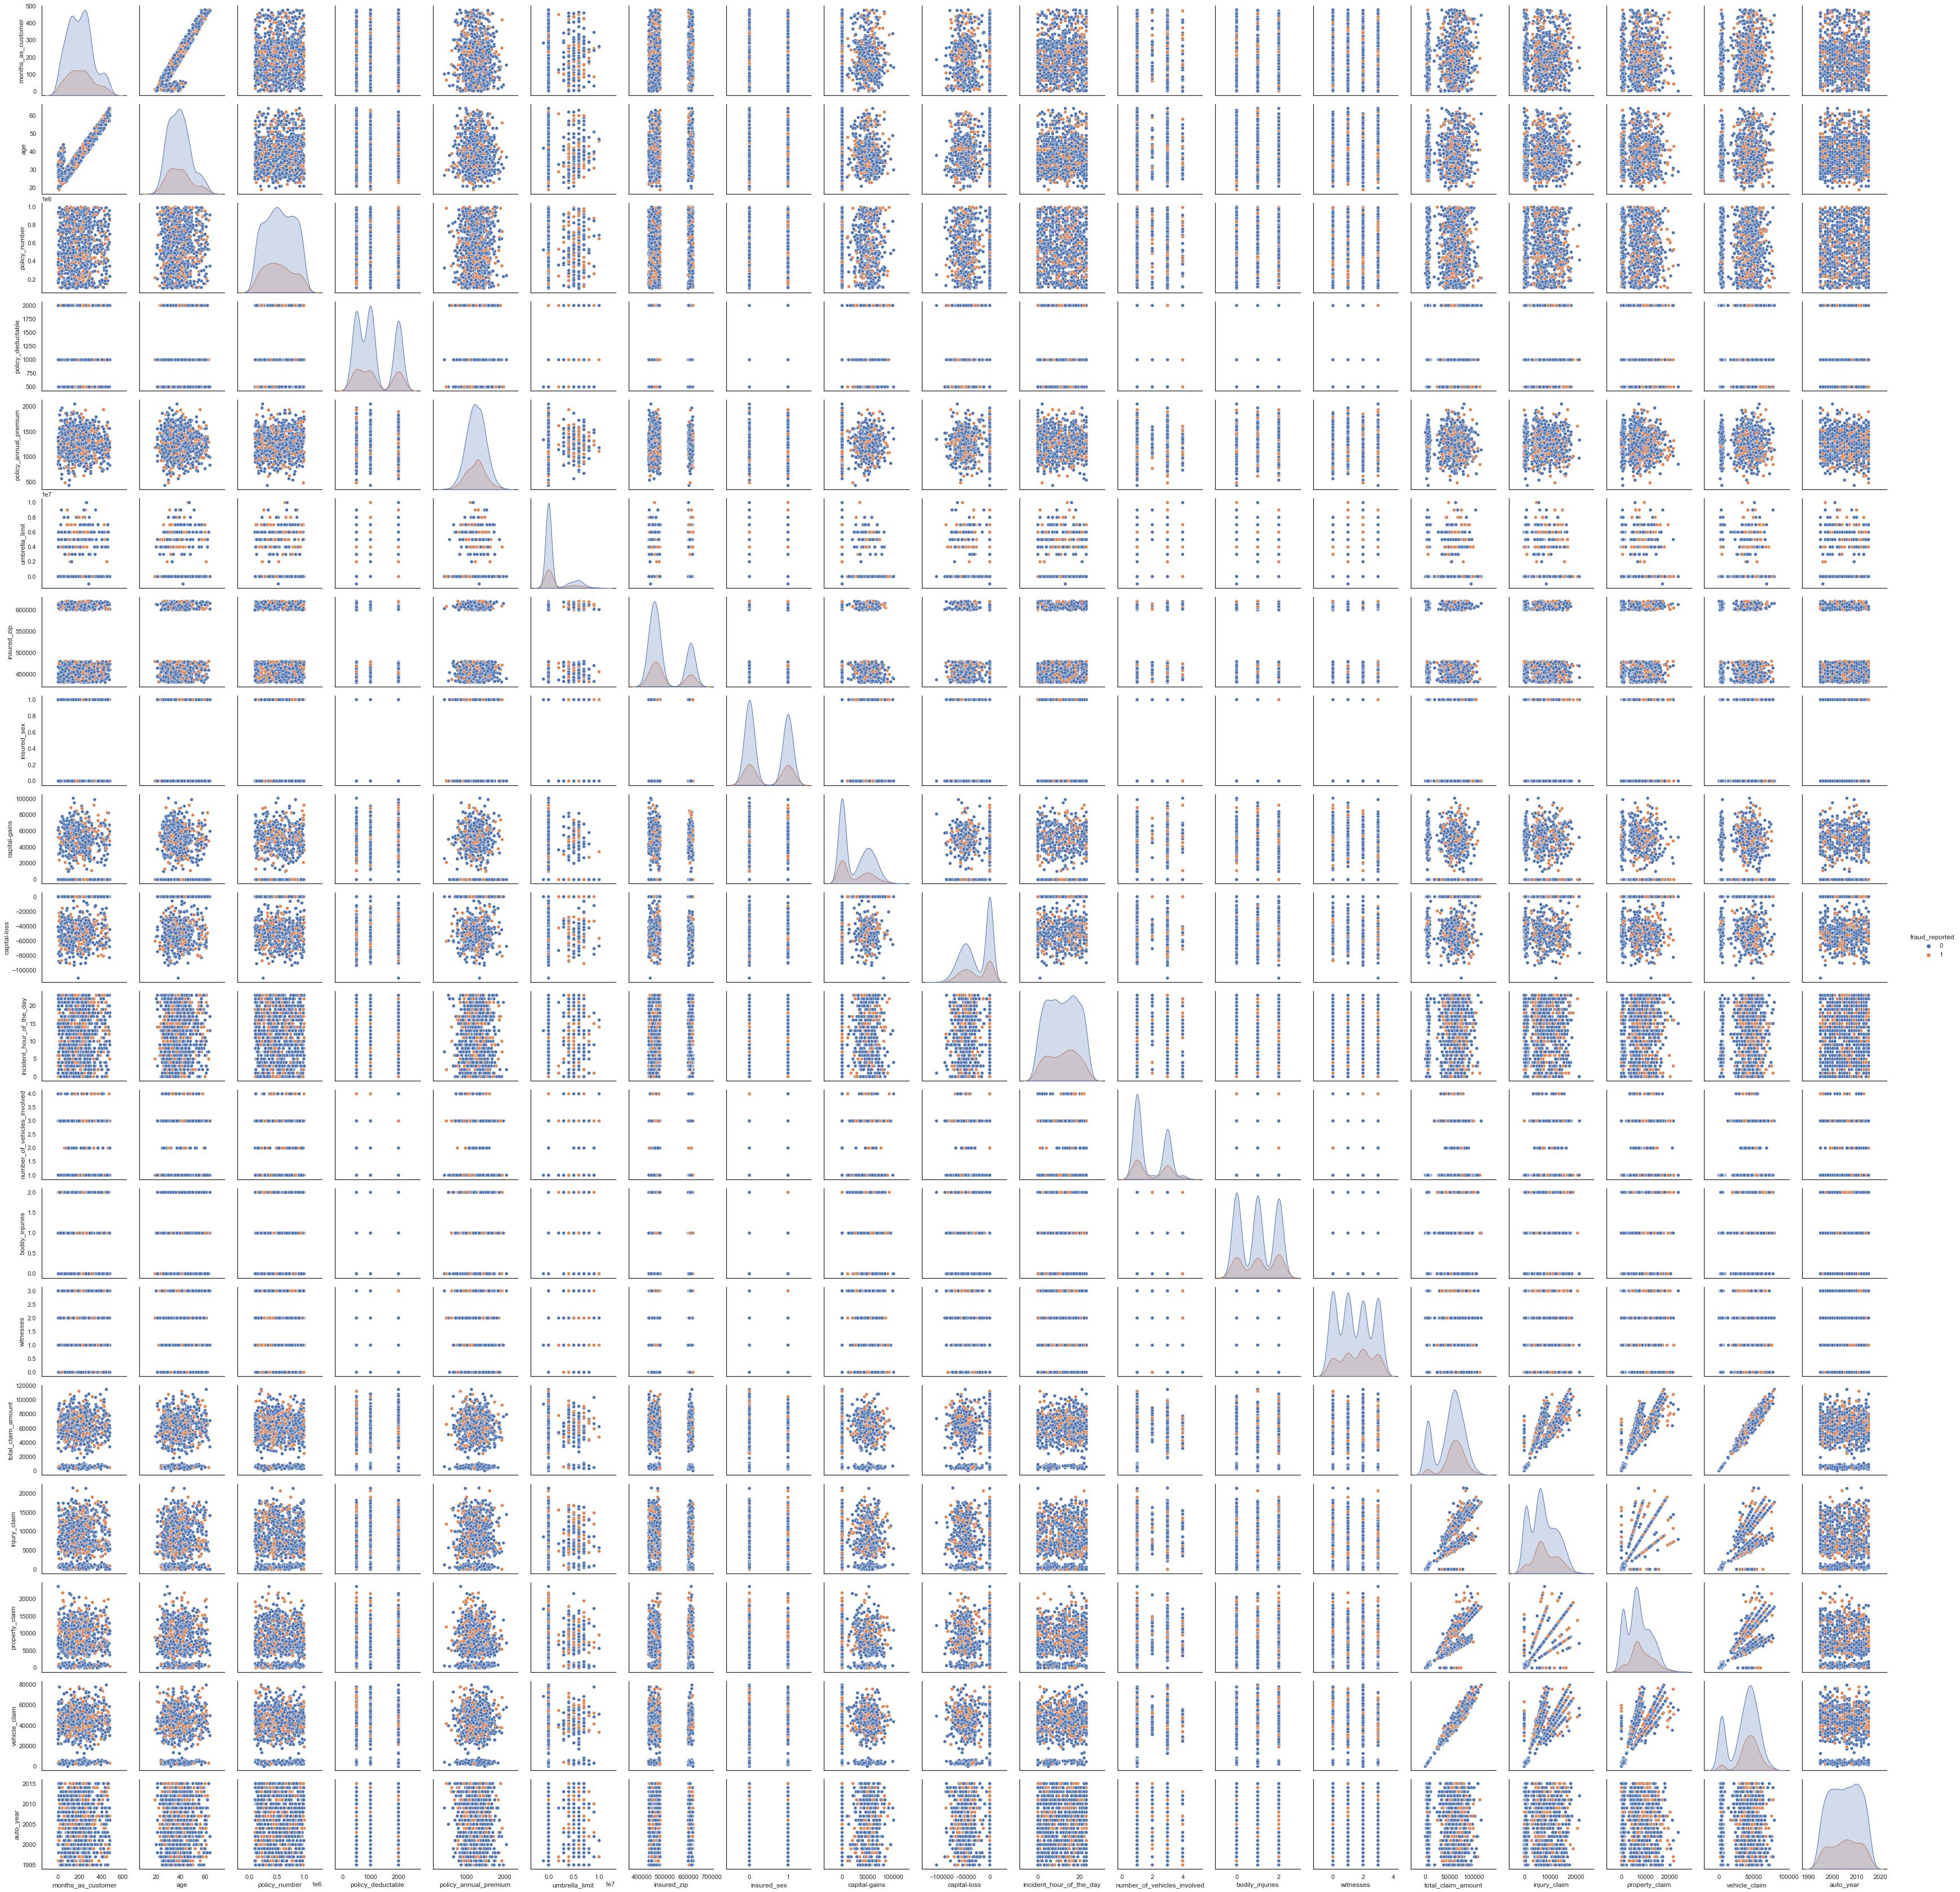

In [100]:
plt.figure(figsize=(8,4))
sn.pairplot(df,hue="fraud_reported")
plt.show()

# Heatmap

<AxesSubplot:>

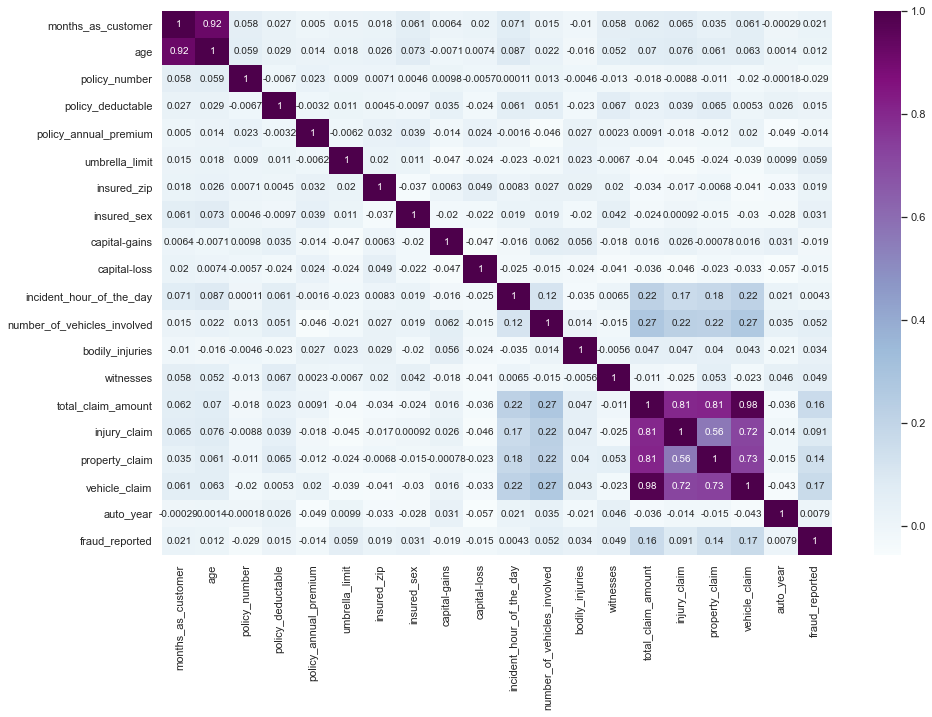

In [101]:
corr = df.corr()
plt.figure(figsize=(15,10))
sn.heatmap(corr, annot = True, cmap="BuPu")

# Outliers

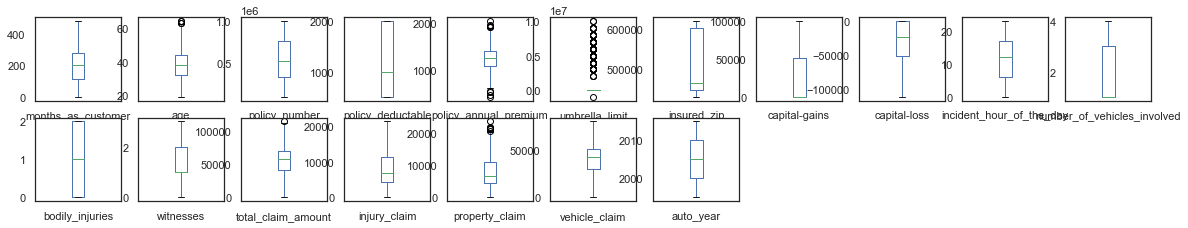

In [123]:
df.plot(kind='box', figsize=(20,20), layout=(11,11), sharex=False, subplots=True);

In [158]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
    #defining quartiles
            quartiles = percentile(df[j], [25,75])
    # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

In [125]:
df.skew()

months_as_customer             0.362177
age                            0.469878
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.016003
umbrella_limit                 0.000000
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.595351
injury_claim                   0.264811
property_claim                 0.348531
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [111]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22               0   
2    100/300               2000                1413.14               0   
3    250/500               2000                1415.74               0   
4   500/1000               1000                1583.91               0   

   insured_zip  ...  witnesses police_report_available total_claim_amount  \
0       466132  ...          2                     YES              71610   
1       468176  ...          0                       ?               5070   
2       430632  ...          3                      NO              34650   
3       608117  ...          2                      NO              63400   
4       610706  ...          1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 39 columns]

# Label Encoding

In [126]:
#lets do Lable enconding coding to make more features 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


<AxesSubplot:>

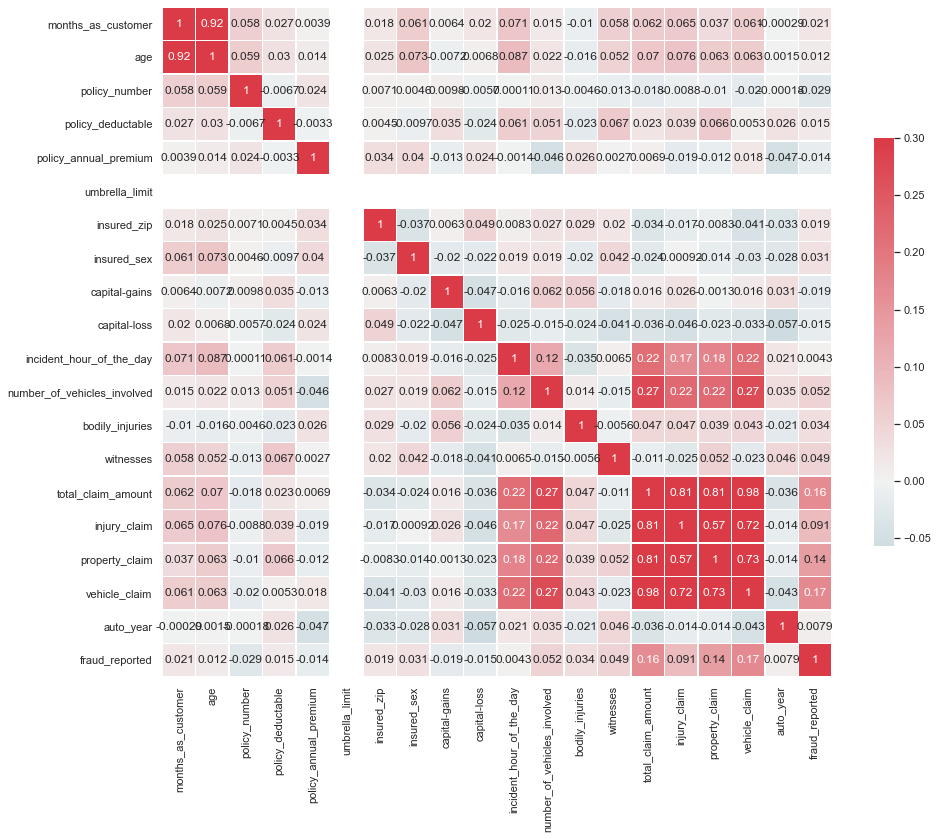

In [127]:
#data = pd.get_dummies(data)
#print('Training Features shape: ', data.shape)
sn.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

sn.heatmap(df.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [128]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

Col_name  Value
14        incident_location   1000
0          policy_bind_date    951
7             incident_date     60
18               auto_model     39
5           insured_hobbies     20
4        insured_occupation     14
17                auto_make     14
3   insured_education_level      7
12           incident_state      7
13            incident_city      7
6      insured_relationship      6
11    authorities_contacted      5
8             incident_type      4
10        incident_severity      4
9            collision_type      4
1              policy_state      3
2                policy_csl      3
15          property_damage      3
16  police_report_available      3

In [129]:
# droping columns based on above result
df.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

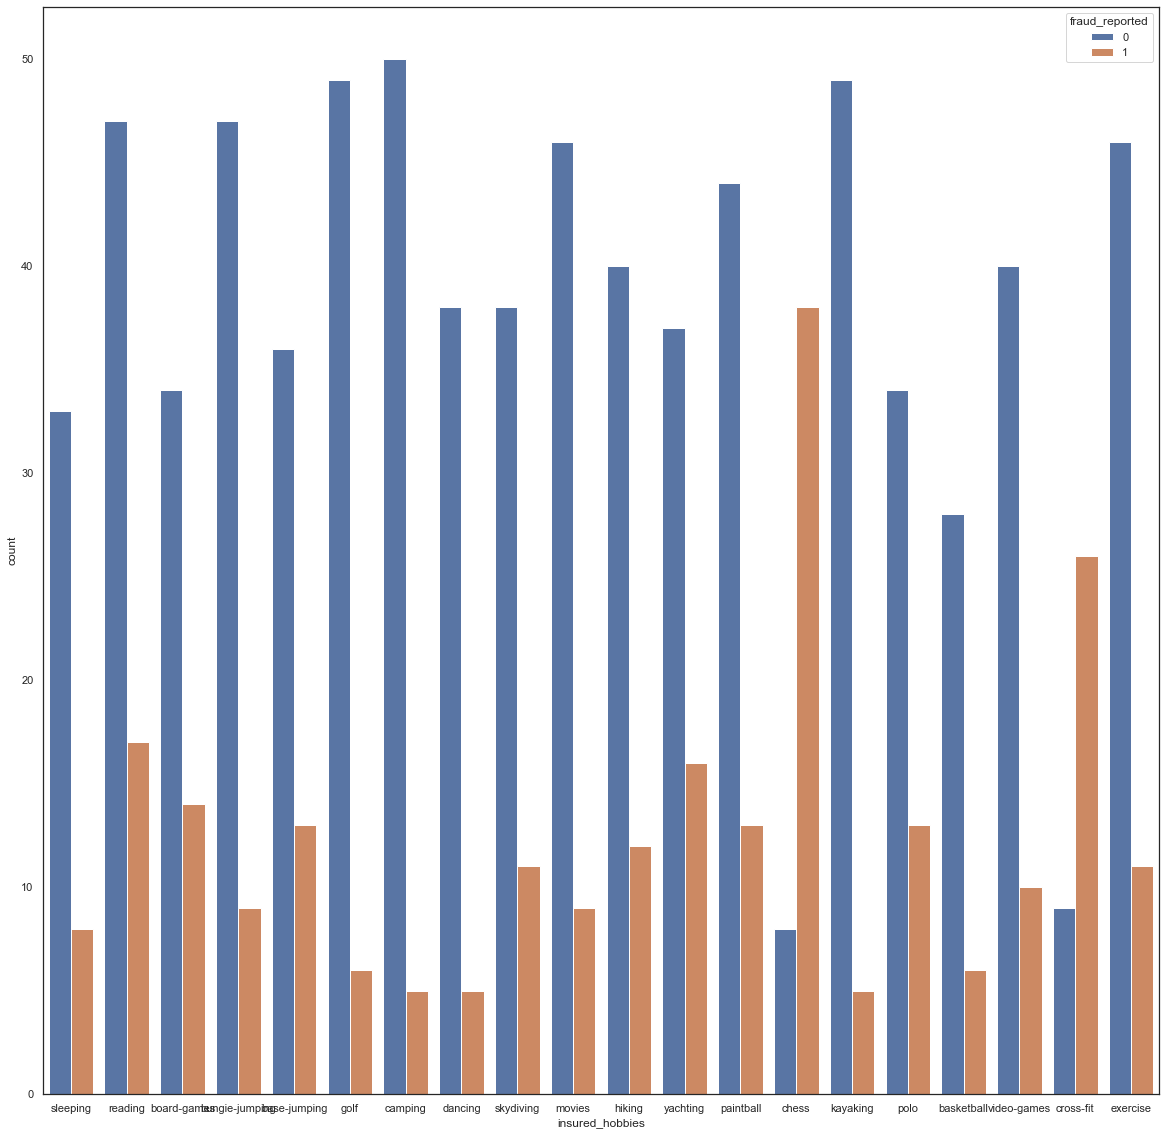

In [130]:
f, ax = plt.subplots(figsize=(20, 20))
sn.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

In [131]:
df['insured_hobbies']=df['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

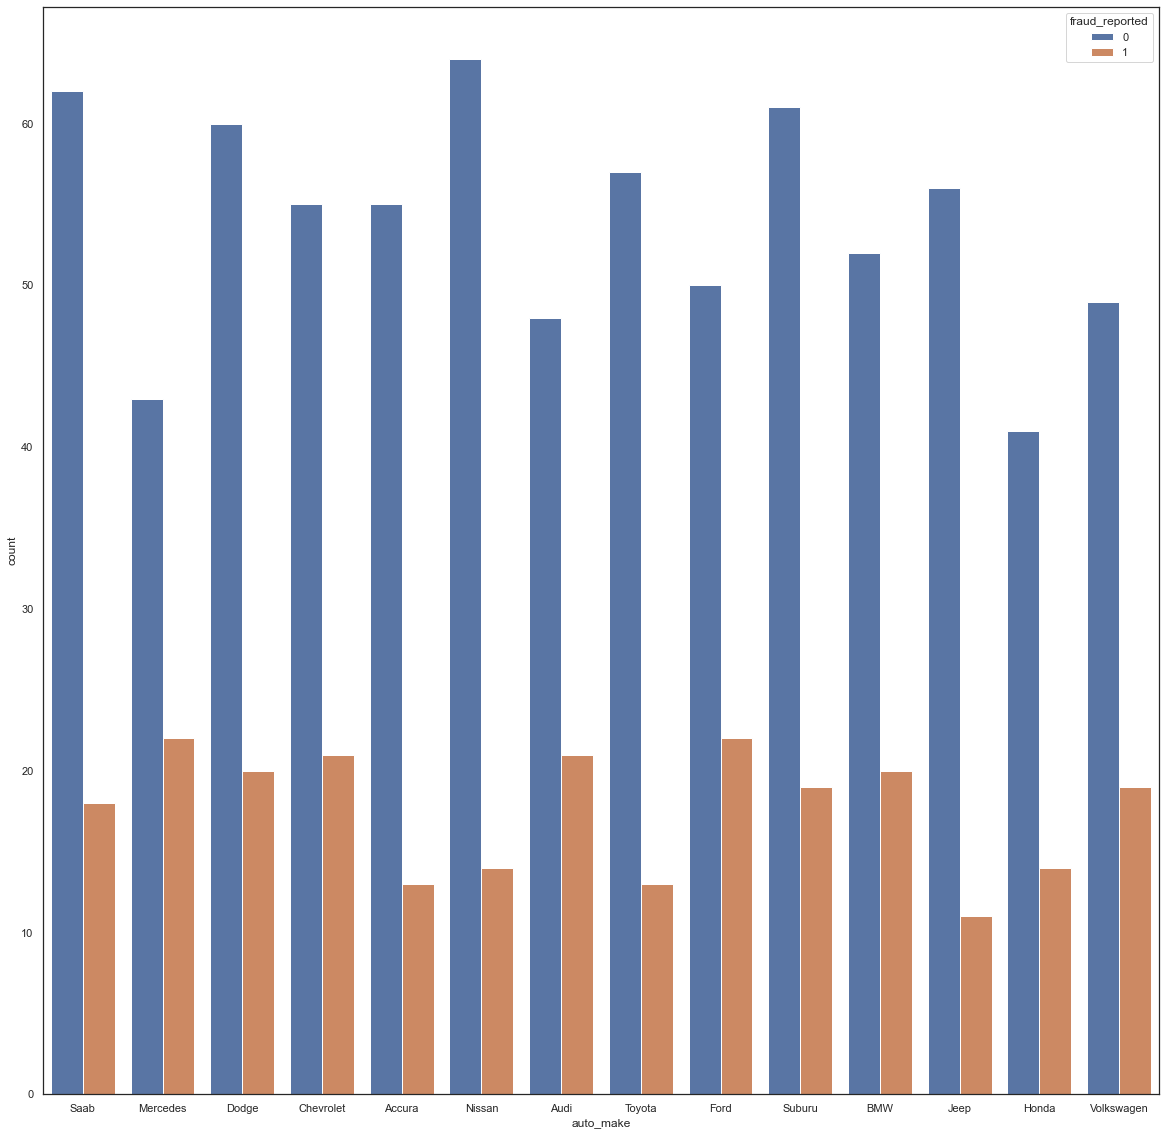

In [47]:
f, ax = plt.subplots(figsize=(20, 20))
sn.countplot(x='auto_make',hue='fraud_reported',data=df)

In [132]:
df['insured_hobbies'].unique()

array(['Other', 'chess', 'cross-fit'], dtype=object)

In [133]:
data = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (1000, 33)


# Data preprocessing

In [160]:
# let's extrat days, month and year from policy bind date

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [159]:
# let's encode the fraud report to numerical values

df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))

# checking the values of fraud reported
# data['fraud_reported'].value_counts()

In [161]:
# let's check the correlation of authorities_contacted with the target

df[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

auto_model  fraud_reported
0         3 Series        0.944444
31             RSX        0.916667
25          Malibu        0.900000
36        Wrangler        0.880952
29      Pathfinder        0.870968
35          Ultima        0.869565
9            Camry        0.857143
11         Corolla        0.850000
8              CRV        0.850000
21          Legacy        0.843750
27            Neon        0.837838
3               95        0.814815
33              TL        0.800000
2               93        0.800000
23             MDX        0.777778
6           Accord        0.769231
17  Grand Cherokee        0.760000
13          Escape        0.750000
12            E400        0.740741
4               A3        0.729730
18      Highlander        0.727273
28          Passat        0.727273
1              92x        0.714286
20           Jetta        0.714286
16          Fusion        0.714286
15       Forrestor        0.714286
26          Maxima        0.708333
19         Impreza        0.700000
37              X5        0.695652
30             RAM        0.674419
22              M5        0.666667
5               A5        0.656250
10           Civic        0.636364
14            F150        0.629630
34           Tahoe        0.625000
7             C300        0.611111
24           ML350        0.600000
32       Silverado        0.590909
38              X6        0.562500

In [163]:
# let's perform target encoding for auto make

df['auto_make'] = df['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))

# let's check the values
# df['auto_make'].value_counts()

In [164]:
# let's check the correlation auto make with the target

df[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

auto_make  fraud_reported
7         Jeep        0.835821
9       Nissan        0.820513
12      Toyota        0.814286
0       Accura        0.808824
10        Saab        0.775000
11      Suburu        0.762500
4        Dodge        0.750000
6        Honda        0.745455
3    Chevrolet        0.723684
2          BMW        0.722222
13  Volkswagen        0.720588
1         Audi        0.695652
5         Ford        0.694444
8     Mercedes        0.661538

In [165]:


df['auto_make'] = df['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.84,0.82,0.81,0.80,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.69,0.69,0.66))

# let's check the values
# df['auto_make'].value_counts()

In [166]:


df[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

police_report_available  fraud_reported
2                     YES        0.770701
1                      NO        0.749271
0                       ?        0.740525

In [167]:


df['police_report_available'] = df['police_report_available'].replace(('NO','YES'),(0.77,0.74))

# let's check the values
# data['police_report_available'].value_counts()

In [168]:
df[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

property_damage  fraud_reported
1              NO        0.804734
2             YES        0.741722
0               ?        0.713889

In [169]:
# let's perform target encoding for property damage

df['property_damage'] = df['property_damage'].replace(('NO','YES'),(0.76,0.74))

# let's check the values
# data['property_damage'].value_counts()

In [170]:
# let's check the correlation of authorities_contacted with the target

df[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_city  fraud_reported
4    Northbrook        0.778689
5     Riverwood        0.776119
3     Northbend        0.765517
6   Springfield        0.757962
2     Hillsdale        0.751773
1      Columbus        0.738255
0     Arlington        0.710526

In [171]:
# let's do target encoding for incident city

df['incident_city'] = df['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.74,0.73,0.71))

# let's check the values
# df['incident_city'].value_counts()

In [172]:
# let's check the correlation of authorities_contacted with the target

df[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_state  fraud_reported
6             WV        0.820276
1             NY        0.778626
5             VA        0.772727
3             PA        0.733333
4             SC        0.705645
0             NC        0.690909
2             OH        0.565217

In [173]:
# let's perform target encoding for incident state

df['incident_state'] = df['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.77,0.76,0.73,0.70,0.69,0.56))

# checking the values
# data['incident_state'].value_counts()

In [174]:
# let's check the correlation of authorities_contacted with the target

df[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

authorities_contacted  fraud_reported
2                  None        0.934066
4                Police        0.791096
1                  Fire        0.730942
0             Ambulance        0.709184
3                 Other        0.681818

# Modelling with Ensemble of Samplers

In [181]:
# let's split the data into dependent and independent sets

x = data.drop(['fraud_reported'], axis = 1)
y = data['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 91)
Shape of y : (1000,)


In [182]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 91)
Shape of x_test : (200, 91)
Shape of y_train : (800,)
Shape of y_test : (200,)


# Random Forest Classifier

Training Accuracy:  0.89375
Testing Accuarcy:  0.85
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       143
           1       0.70      0.82      0.76        57

    accuracy                           0.85       200
   macro avg       0.81      0.84      0.82       200
weighted avg       0.86      0.85      0.85       200



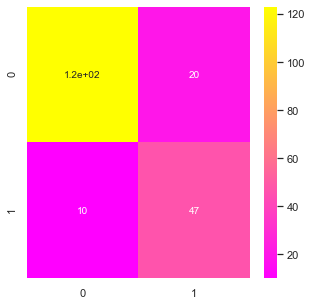

In [184]:
# Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sn.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

# Easy Ensemble Classifier

Training Accuracy:  0.8475
Testing Accuarcy:  0.795
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       143
           1       0.61      0.77      0.68        57

    accuracy                           0.80       200
   macro avg       0.75      0.79      0.77       200
weighted avg       0.82      0.80      0.80       200



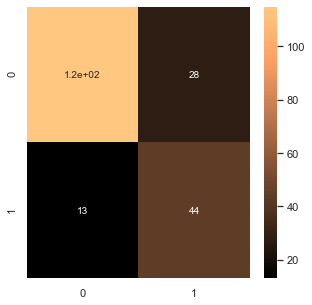

In [185]:
# Easy Ensemble Classifier

from imblearn.ensemble import EasyEnsembleClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)

model1.fit(x_train, y_train)
y_pred_ef = model1.predict(x_test)

print("Training Accuracy: ", model1.score(x_train, y_train))
print('Testing Accuarcy: ', model1.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_ef)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred_ef)
sn.heatmap(cm, annot = True, cmap = 'copper')
plt.show()

# Bagging Classifier

Training Accuracy:  0.92625
Testing Accuarcy:  0.85
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       143
           1       0.71      0.79      0.75        57

    accuracy                           0.85       200
   macro avg       0.81      0.83      0.82       200
weighted avg       0.86      0.85      0.85       200



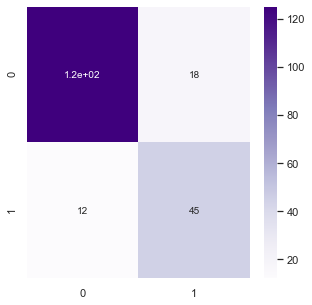

In [186]:
# Random Forest with Bagging Classifier

from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
                 

model2 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
                                 sampling_strategy = 'auto',
                                 replacement = False,
                                 random_state = 0)

model2.fit(x_train, y_train)
y_pred_bc = model2.predict(x_test)

print("Training Accuracy: ", model2.score(x_train, y_train))
print('Testing Accuarcy: ', model2.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_bc)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred_bc)
sn.heatmap(cm, annot = True, cmap = 'Purples')
plt.show()

# Boosting the Predictions of above Models

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       143
           1       0.70      0.82      0.76        57

    accuracy                           0.85       200
   macro avg       0.81      0.84      0.82       200
weighted avg       0.86      0.85      0.85       200



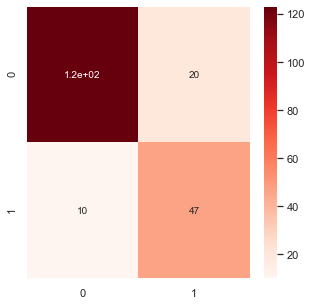

In [187]:
# boosting

y_pred = y_pred_rf*0.5 + y_pred_ef*0.2 + y_pred_bc*0.3

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot = True, cmap = 'Reds')
plt.show()

# Voting Classifier

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       143
           1       0.71      0.84      0.77        57

    accuracy                           0.85       200
   macro avg       0.82      0.85      0.83       200
weighted avg       0.87      0.85      0.86       200



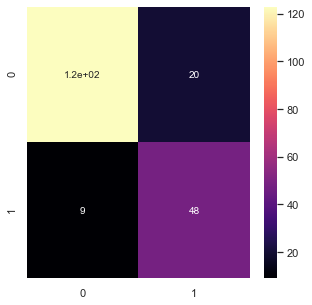

In [189]:
from sklearn.ensemble import VotingClassifier

vote_est = [ 
    ('brf', BalancedRandomForestClassifier()),
    ('bc', BalancedBaggingClassifier()),
    ('eec',EasyEnsembleClassifier())]

voting = VotingClassifier(estimators = vote_est , voting = 'soft')
voting.fit(x_train, y_train)

y_pred = voting.predict(x_test).astype(int)

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot = True, cmap = 'magma')
plt.show()

# Applying Sampling Techniques

In [190]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [191]:
frauds = np.array(data[df['fraud_reported'] == 0].index)
no_frauds = len(frauds)

print(no_frauds)

247


In [193]:
normal_indices = data[df['fraud_reported'] == 1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

753


In [194]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_frauds, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

247


In [195]:
under_sample = np.concatenate([frauds, random_normal_indices])
print(len(under_sample))

494


In [196]:
undersample_data = data.iloc[under_sample, :]

In [197]:
# splitting the undersample dataset into x and y sets

x_u = undersample_data.iloc[:, undersample_data.columns != 'fraud_reported'] 
y_u = undersample_data.iloc[:, undersample_data.columns == 'fraud_reported']

print(x_u.shape)
print(y_u.shape)

(494, 91)
(494, 1)


In [198]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_u, y_u, test_size = 0.2, random_state = 0)

print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)

(395, 91)
(395, 1)
(99, 91)


In [199]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

Training Accuracy:  1.0
Testing Accuarcy:  0.8585858585858586


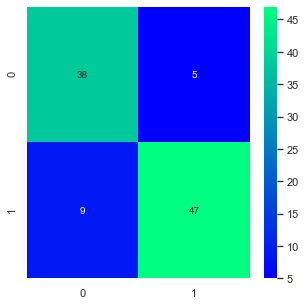

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        43
           1       0.90      0.84      0.87        56

    accuracy                           0.86        99
   macro avg       0.86      0.86      0.86        99
weighted avg       0.86      0.86      0.86        99



In [201]:
from sklearn.ensemble import RandomForestClassifier

model_u = RandomForestClassifier()
model_u.fit(x_train1, y_train1)

y_pred = model_u.predict(x_test1)

print("Training Accuracy: ", model_u.score(x_train1, y_train1))
print('Testing Accuarcy: ', model_u.score(x_test1, y_test1))

# confusion matrix
cm = confusion_matrix(y_test1, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sn.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test1, y_pred)
print(cr)